## Apress - Industrialized Machine Learning Examples

Andreas Francois Vermeulen
2019

### This is an example add-on to a book and needs to be accepted as part of that copyright.

# Chapter-015-09-Build-RAPTOR-Mars-03

![RAPTOR-QUBE](../../images/raptorqube/raptorqube-full.bmp)

In [1]:
import datetime
nowStart = datetime.datetime.now()

In [2]:
import matplotlib
matplotlib.use('TkAgg')
%matplotlib inline

In [3]:
import pandas as pd
import os
# The kmeans algorithm is implemented in the scikits-learn library
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt

In [4]:
pathDL='../../Results/Chapter 15/999-DL/'

In [5]:
locationHubName1 = os.path.join(pathDL,'300-Curated-Zone', 'Hub', 'Location', 'Hub-Location.csv.gz')

In [6]:
location1DF=pd.read_csv(locationHubName1, header=0, encoding='utf-8', compression='gzip')
location1DF.index.name = 'ID'
location1DF.columns=['Longitude','Latitude']
#location1DF['Mine']=0

In [7]:
print(location1DF.shape)

(64800, 2)


In [8]:
A = location1DF

In [9]:
resultA=[]
for k in range (1, 10):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(A.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
    resultA.append([k, interia])

('k:', 1, ' cost:', 874789200.0)
('k:', 2, ' cost:', 349909200.0)
('k:', 3, ' cost:', 252720000.0)
('k:', 4, ' cost:', 200739220.9136224)
('k:', 5, ' cost:', 156468143.02425936)
('k:', 6, ' cost:', 121499296.69877742)
('k:', 7, ' cost:', 102283828.38509442)
('k:', 8, ' cost:', 87482584.06605916)
('k:', 9, ' cost:', 78936030.72596724)


In [10]:
#print(resultA)

In [11]:
data = np.array(resultA)
x, y = data.T

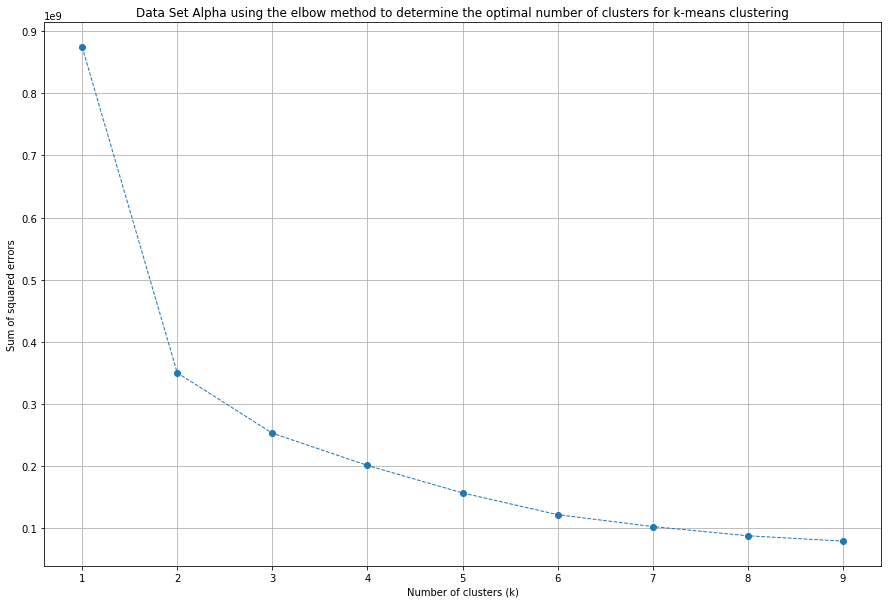

In [12]:
fig=plt.figure(figsize=(15,10))
plt.plot(x, y, linestyle='--', marker='o', linewidth=1.0)

titlestr='Data Set Alpha using the elbow method to determine the optimal number of clusters for k-means clustering'
plt.title(titlestr)
plt.ylabel('Sum of squared errors')
plt.xlabel('Number of clusters (k)')
plt.grid()
plt.show()

In [13]:
locationHubName2 = os.path.join(pathDL,'300-Curated-Zone', 'Satellite', 'Location', 'Satellite-Location-MarsMine.csv.gz')

In [14]:
location2DF=pd.read_csv(locationHubName2, header=0, encoding='utf-8', compression='gzip')
location2DF.index.name = 'ID'
location2DF.columns=['MineID','Longitude','Latitude']
#location2DF['Mine']=1
is_mine=location2DF['MineID'] > 0

location3DF=location2DF[is_mine]

In [15]:
print(location2DF.shape)
print(location3DF.shape)

(5, 3)
(4, 3)


In [16]:
B = location3DF

In [17]:
resultB=[]
for k in range (1, B.shape[0]):
    # Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
    kmeans_model = KMeans(n_clusters=k, random_state=1).fit(B.iloc[:, :])
    # These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
    labels = kmeans_model.labels_
    # Sum of distances of samples to their closest cluster center
    interia = kmeans_model.inertia_
    print ("k:",k, " cost:", interia)
    resultB.append([k, interia])

('k:', 1, ' cost:', 21364.75)
('k:', 2, ' cost:', 6612.666666666666)
('k:', 3, ' cost:', 1961.5)


In [18]:
#print(resultB)

In [19]:
data = np.array(resultB)
x, y = data.T

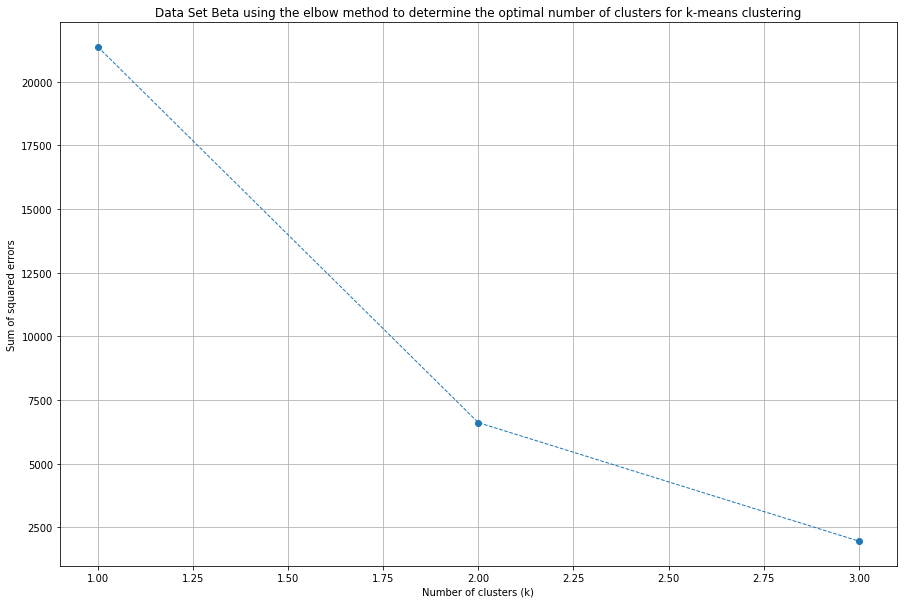

In [20]:
fig=plt.figure(figsize=(15,10))
plt.plot(x, y, linestyle='--', marker='o', linewidth=1.0)

titlestr='Data Set Beta using the elbow method to determine the optimal number of clusters for k-means clustering'
plt.title(titlestr)
plt.ylabel('Sum of squared errors')
plt.xlabel('Number of clusters (k)')
plt.grid()
plt.show()

# Process Done

In [21]:
nowStop = datetime.datetime.now()
runTime=nowStop-nowStart
print('Start:', nowStart.strftime('%Y-%m-%d %H:%M:%S'))
print('Stop: ', nowStop.strftime('%Y-%m-%d %H:%M:%S'))
print('Time: ', runTime)

('Start:', '2019-05-04 22:30:43')
('Stop: ', '2019-05-04 22:31:17')
('Time: ', datetime.timedelta(0, 33, 749000))
